<img src="https://www.saedsayad.com/images/Decision_Tree_1.png" style="width:400px;height:200px;">
<h1 color="blue">Decision Tree</h1>

entropy  is the maesure of randomness in the sample.
Gini Impurity (Gini) = 1 - Σ(p_i^2)
Gini impurity - is a metric that helps decision tree algorithms measure the impurity or randomness in a dataset, making it a useful tool for constructing decision trees in machine learning for classification tasks.

ranges from 0 to 0.5 - 0 mean correctly classified and 0.5 mean elements are evenly distributed across all classes, indicating maximum impurity and randomness.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Bezawada\Downloads\salaries.csv")
df.head(10)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [39]:
input = df.drop("salary_more_then_100k",axis = 'columns')
input

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [40]:
target = df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [42]:
#creating new columns 
input['company_n'] = le_company.fit_transform(input['company'])
input['job_n'] = le_job.fit_transform(input['job'])
input['degree_n'] = le_degree.fit_transform(input['degree'])

In [46]:
input.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [47]:
input_n = input.drop(['company', 'job', 'degree'],axis ='columns')
input_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [48]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_n,target,test_size = 0.2)

In [50]:
len(x_train)

12

In [51]:
len(x_test)

4

In [52]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
model.predict(x_test)

array([1, 1, 0, 0], dtype=int64)

In [54]:
model.score(x_test,y_test)

0.75

In [55]:
model.predict([[2,2,1]])

C:\Users\Bezawada\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [56]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[1, 0],
       [1, 2]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

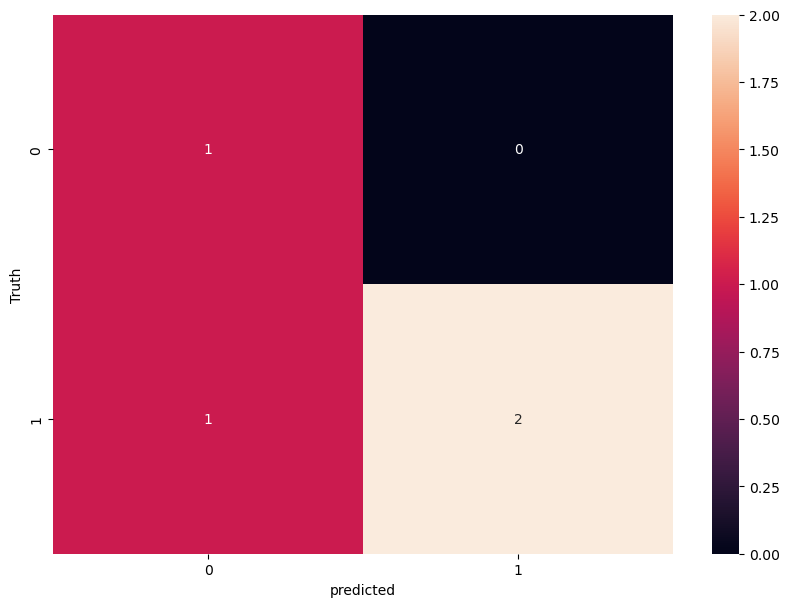

In [57]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth') 